## Week 2_Day 10: Decision Tree

In [13]:
# library and helper import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

In [2]:
#helper function for plotting boundary line
def plot_decision_boundary(model, X, y, title=None, h=0.02):
    X = np.asarray(X)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    if title:
        plt.title(title)
    plt.show()


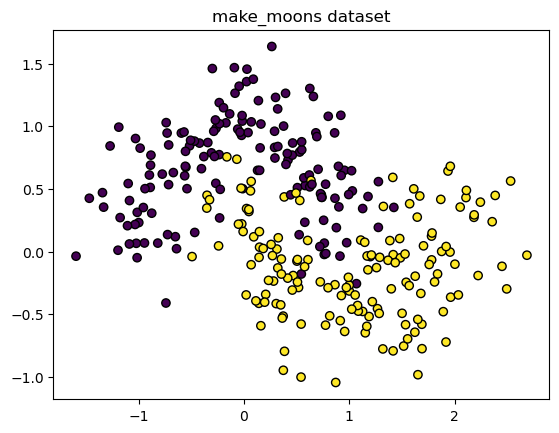

In [3]:
#loading and plotting the dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("make_moons dataset")
plt.show()

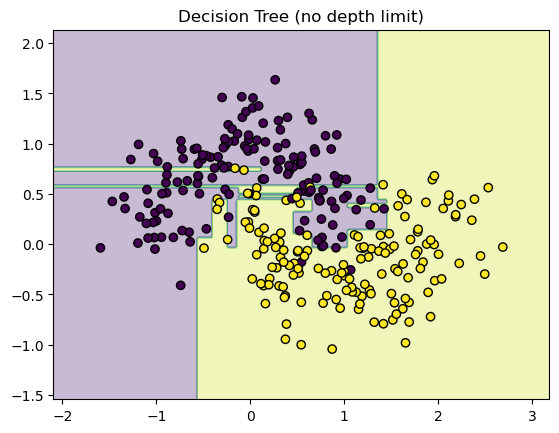

In [4]:
# training unrestricted tree
tree_unlimited = DecisionTreeClassifier(random_state=42)
tree_unlimited.fit(X, y)

plot_decision_boundary(tree_unlimited, X, y, title="Decision Tree (no depth limit)")


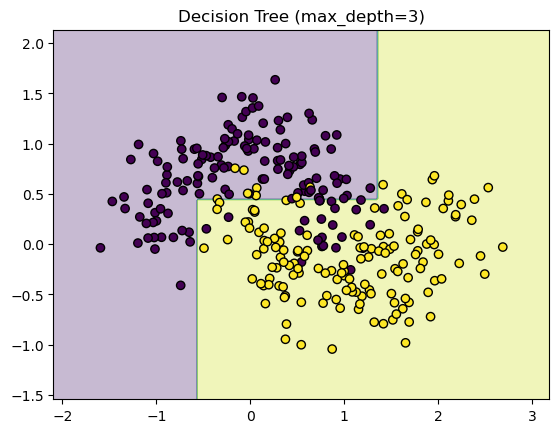

In [5]:
# training tree with restrictions
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_depth3.fit(X, y)

plot_decision_boundary(tree_depth3, X, y, title="Decision Tree (max_depth=3)")

### Real dataset: DecisionTreeClassifier on Breast Cancer

In [6]:
# dataset load and split
cancer = load_breast_cancer(as_frame=True)
dfc = cancer.frame

x = dfc.drop(columns=["target"])
y = dfc["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 420, stratify = y
)

Baseline Tree Accuracy: 0.9035087719298246


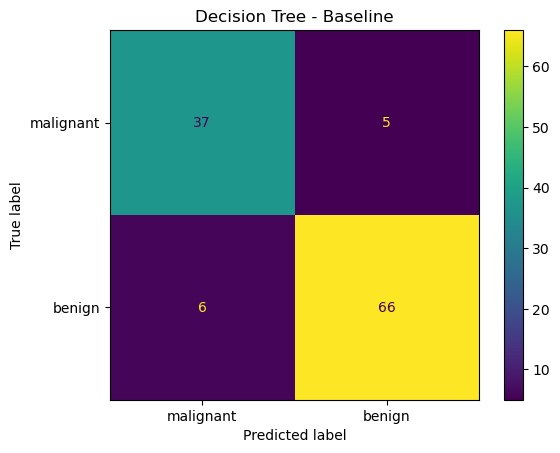

In [7]:
# training and testing with a unrestricted tree
breastree = DecisionTreeClassifier(random_state=420)
breastree.fit(x_train, y_train)

y_pred = breastree.predict(x_test)

breastaccuracy = accuracy_score(y_test, y_pred)
print("Baseline Tree Accuracy:", breastaccuracy)

cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot()
plt.title("Decision Tree - Baseline")
plt.show()

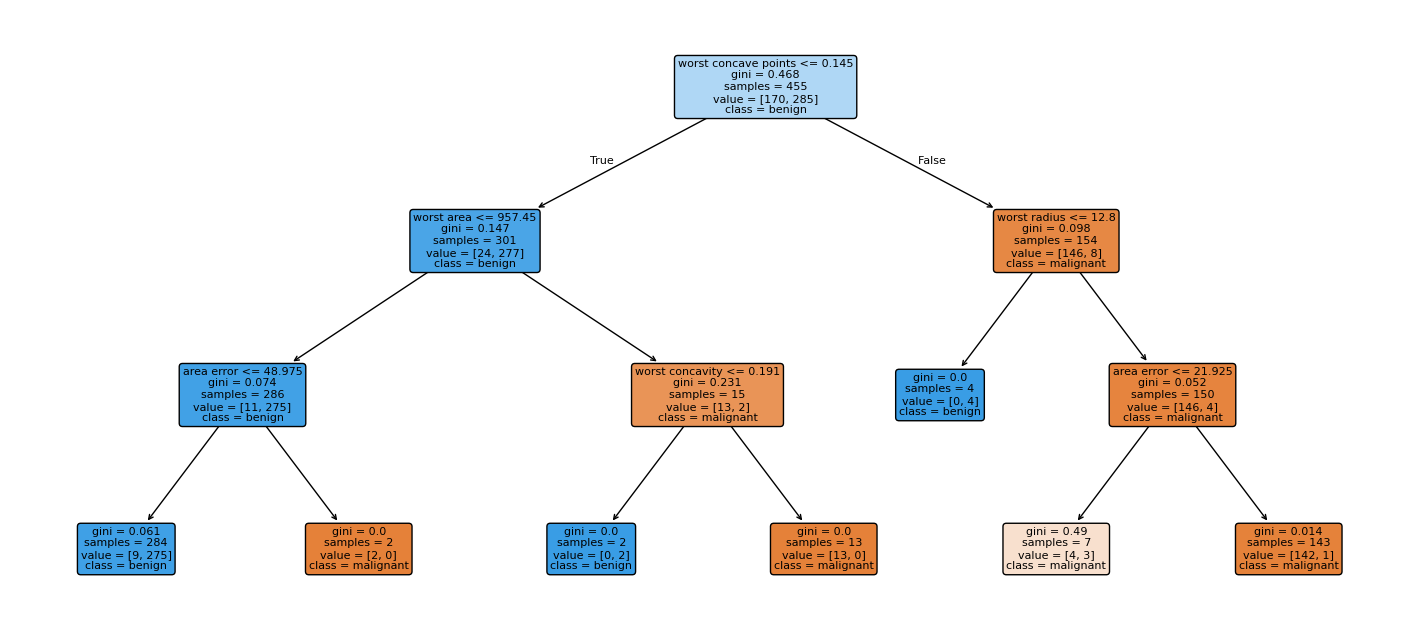

In [8]:
#visualizing a small restricted tree - optional
small_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
small_tree.fit(x_train, y_train)

plt.figure(figsize=(18, 8))
plot_tree(
    small_tree,
    feature_names=x.columns,
    class_names=cancer.target_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()


### DecisionTreeRegressor on California Housing

In [9]:
# loading dataset 
housing = fetch_california_housing(as_frame=True)
df_h = housing.frame

# choosing features instead of using the whole dataset
X = df_h[["MedInc", "AveRooms", "HouseAge"]]  # simple subset
y = df_h["MedHouseVal"]

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# baseline tree-regressor 
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Baseline tree regressor MSE:", mse)
print("Depth:", tree_reg.get_depth(), "Leaves:", tree_reg.get_n_leaves())


Baseline tree regressor MSE: 1.1026453172341326
Depth: 36 Leaves: 16058


In [11]:
# tree-regressor with restriction
reg_settings = [
    {"max_depth": 4, "min_samples_leaf": 5},
    {"max_depth": 6, "min_samples_leaf": 10},
    {"max_depth": 8, "min_samples_leaf": 20},
]

for s in reg_settings:
    reg = DecisionTreeRegressor(
        random_state=42,
        max_depth=s["max_depth"],
        min_samples_leaf=s["min_samples_leaf"]
    )
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"max_depth={s['max_depth']}, min_samples_leaf={s['min_samples_leaf']} -> MSE={mse:.4f}")


max_depth=4, min_samples_leaf=5 -> MSE=0.6454
max_depth=6, min_samples_leaf=10 -> MSE=0.5850
max_depth=8, min_samples_leaf=20 -> MSE=0.5769


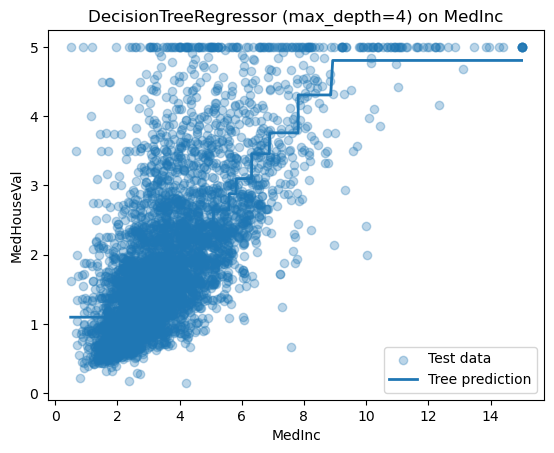

In [12]:
# 1D Visualization - optional 
X1 = df_h[["MedInc"]]
y1 = df_h["MedHouseVal"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

reg_1d = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_1d.fit(X1_train, y1_train)

# sort test set for cleaner plotting
sorted_idx = np.argsort(X1_test["MedInc"])
X_sorted = X1_test.iloc[sorted_idx]
y_sorted = y1_test.iloc[sorted_idx]
y_pred_1d = reg_1d.predict(X_sorted)

plt.scatter(X_sorted["MedInc"], y_sorted, alpha=0.3, label="Test data")
plt.plot(X_sorted["MedInc"], y_pred_1d, label="Tree prediction", linewidth=2)
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.title("DecisionTreeRegressor (max_depth=4) on MedInc")
plt.legend()
plt.show()